In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
# import the dataset
dataset = pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# EDA

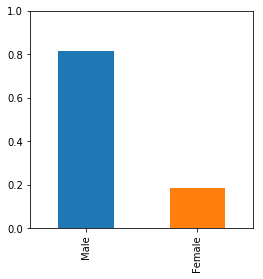

In [389]:
dataset['Gender'].value_counts(normalize=True).plot(kind = "bar",figsize=(4,4), ylim=[0,1])

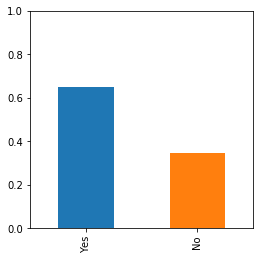

In [390]:
dataset['Married'].value_counts(normalize=True).plot(kind = "bar",figsize=(4,4), ylim=[0,1])

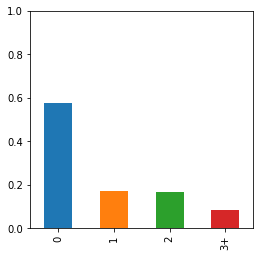

In [391]:
dataset['Dependents'].value_counts(normalize=True).plot(kind = "bar",figsize=(4,4), ylim=[0,1])

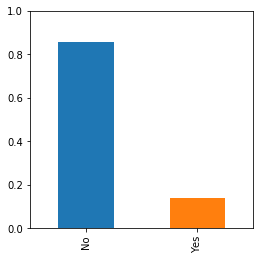

In [392]:
dataset['Self_Employed'].value_counts(normalize=True).plot(kind = "bar",figsize=(4,4),ylim=[0,1])

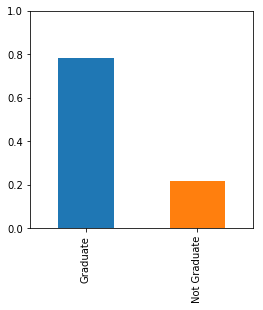

In [393]:
dataset['Education'].value_counts(normalize=True).plot(kind = "bar",figsize=(4,4),ylim=[0,1])

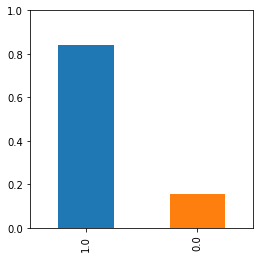

In [394]:
dataset['Credit_History'].value_counts(normalize=True).plot(kind = "bar",figsize=(4,4),ylim=[0,1])

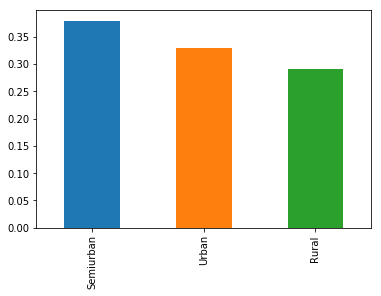

In [395]:
dataset['Property_Area'].value_counts(normalize=True).plot(kind = "bar")

/home/tushar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


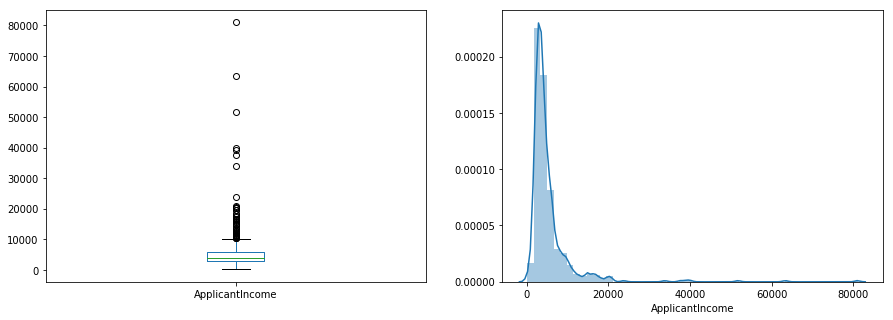

In [396]:
plt.figure(1)
plt.subplot(121)
dataset['ApplicantIncome'].plot(kind = "box",figsize=(15,5))

plt.subplot(122)
sns.distplot(dataset['ApplicantIncome'])

/home/tushar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


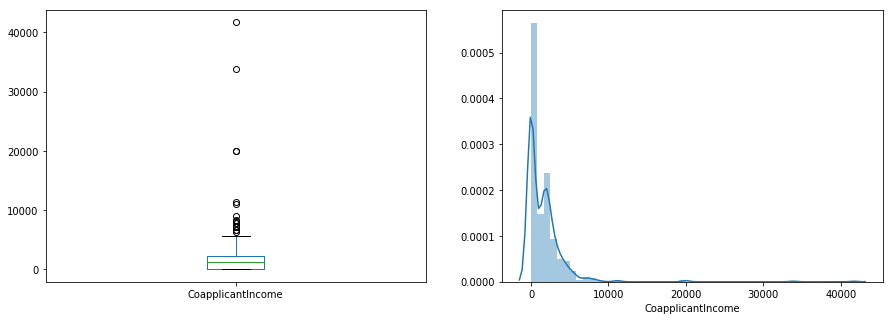

In [397]:
plt.figure(1)
plt.subplot(121)
dataset['CoapplicantIncome'].plot(kind = "box",figsize=(15,5))

plt.subplot(122)
sns.distplot(dataset['CoapplicantIncome'])

/home/tushar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


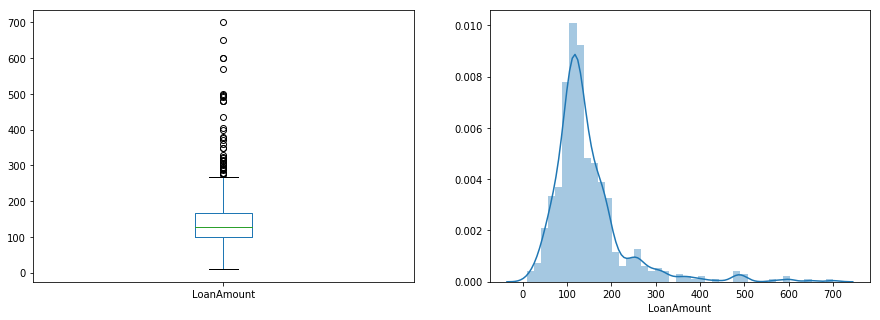

In [398]:
plt.figure(1)
plt.subplot(121)
dataset['LoanAmount'].plot(kind = "box",figsize=(15,5))

plt.subplot(122)
sns.distplot(dataset['LoanAmount'].dropna())

/home/tushar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


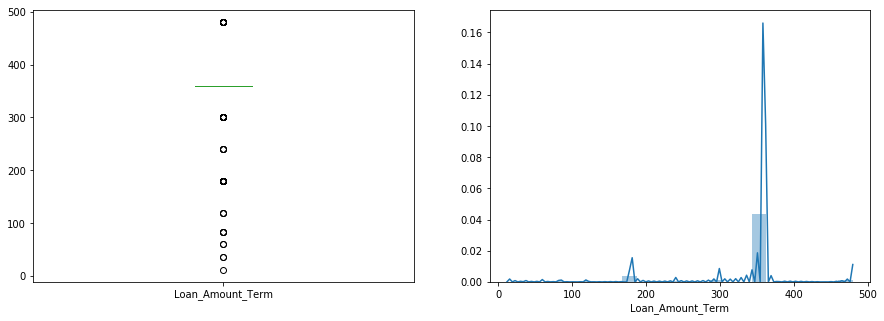

In [399]:
plt.figure(1)
plt.subplot(121)
dataset['Loan_Amount_Term'].plot(kind = "box",figsize=(15,5))

plt.subplot(122)
sns.distplot(dataset['Loan_Amount_Term'].dropna())

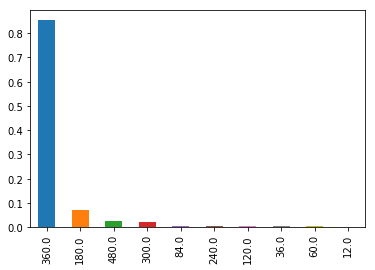

In [400]:
dataset['Loan_Amount_Term'].value_counts(normalize = True).plot(kind = "bar")

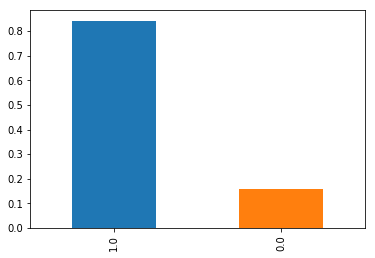

In [401]:
dataset['Credit_History'].value_counts(normalize = True).plot(kind = "bar")

In [402]:
dataset.dropna().corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


# Pre Processing

In [403]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [404]:
# Droppig unnecssary column
dataset.pop('Loan_ID')

# Imputing object colums using mode Value 
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace = True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace = True)
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace = True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace = True)
dataset['Credit_History'].fillna(1,inplace = True)

# Imputing missing values
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace = True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(),inplace = True)


# Outlier Treatment
dataset['ApplicantIncome'].replace(to_replace=0, value=1, inplace=True)
dataset['LoanAmount'].replace(to_replace=0, value=1, inplace=True)
dataset['CoapplicantIncome'].replace(to_replace=0, value=1, inplace=True)

dataset['ApplicantIncome'] = np.log(dataset['ApplicantIncome'])
dataset['LoanAmount'] = np.log(dataset['LoanAmount'])
dataset['CoapplicantIncome'] = np.log(dataset['CoapplicantIncome'])

dataset.dropna(inplace = True)

In [405]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [406]:
# One hot Encoding
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})
dataset['Married'] = dataset['Married'].map({'Yes':1,'No':0})
dataset['Loan_Status'] = dataset['Loan_Status'].map({'Y':1,'N':0})
dataset['Education'] = dataset['Education'].map({'Graduate':1,'Not Graduate':0})
dataset['Self_Employed'] = dataset['Self_Employed'].map({'Yes':1,'No':0})

dummy_vars = pd.get_dummies(dataset['Property_Area'],drop_first=True)
dataset.drop(['Property_Area'],axis=1,inplace=True )
dataset = pd.concat([dummy_vars,dataset],axis=1)

dummy_vars = pd.get_dummies(dataset['Dependents'],drop_first=True)
dataset.drop(['Dependents'],axis=1,inplace=True )
dataset = pd.concat([dummy_vars,dataset],axis=1)

In [407]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 15 columns):
1                    614 non-null uint8
2                    614 non-null uint8
3+                   614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
dtypes: float64(5), int64(5), uint8(5)
memory usage: 55.8 KB


In [408]:
corr = dataset.corr()
corr

,1,2,3+,Semiurban,Urban,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1.000000,-0.198046,-0.134337,0.011661,0.069320,-0.004466,0.113853,0.013355,0.082044,0.072483,0.013858,0.057542,-0.088492,0.009757,-0.038740
2,-0.198046,1.000000,-0.133547,-0.012017,0.016569,0.129953,0.249547,-0.020822,0.032434,-0.003661,0.060488,0.046270,-0.010609,0.007987,0.062384
3+,-0.134337,-0.133547,1.000000,0.007863,-0.047460,0.096319,0.132566,-0.055288,0.003278,0.111812,-0.061284,0.123673,-0.077273,-0.060473,-0.026123
Semiurban,0.011661,-0.012017,0.007863,1.000000,-0.547574,-0.108623,0.005845,0.039410,0.008710,0.005662,-0.018203,0.007197,0.059141,0.035976,0.136540
Urban,0.069320,0.016569,-0.047460,-0.547574,1.000000,0.034530,0.000546,0.034279,-0.030338,-0.027612,-0.036783,-0.083473,-0.094279,-0.016934,-0.043621
Gender,-0.004466,0.129953,0.096319,-0.108623,0.034530,1.000000,0.364569,-0.045364,-0.000525,0.084514,0.220563,0.143388,-0.074030,0.009170,0.017987
Married,0.113853,0.249547,0.132566,0.005845,0.000546,0.364569,1.000000,-0.012304,0.004489,0.021424,0.317062,0.179802,-0.100912,0.010938,0.091478
Education,0.013355,-0.020822,-0.055288,0.039410,0.034279,-0.045364,-0.012304,1.000000,0.010383,0.181713,-0.043131,0.145885,0.073928,0.073658,0.085884
Self_Employed,0.082044,0.032434,0.003278,0.008710,-0.030338,-0.000525,0.004489,0.010383,1.000000,0.189821,-0.092291,0.109677,-0.033739,-0.001550,-0.003700
ApplicantIncome,0.072483,-0.003661,0.111812,0.005662,-0.027612,0.084514,0.021424,0.181713,0.189821,1.000000,-0.368224,0.491332,-0.031731,0.013468,0.010977


In [409]:
X = dataset.drop('Loan_Status',1)
y = dataset.Loan_Status

In [410]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=98)

In [411]:
y_train.value_counts(normalize = True)

1    0.684318
0    0.315682
Name: Loan_Status, dtype: float64

# Model Selection

In [412]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[17 20]
 [ 1 85]]

Accuracy: 0.8292682926829268


/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [413]:
from sklearn.svm import SVC
classifier = SVC(gamma = "auto")

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[16 21]
 [ 1 85]]

Accuracy: 0.8211382113821138


In [414]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[ 9 28]
 [ 5 81]]

Accuracy: 0.7317073170731707


In [415]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[17 20]
 [ 4 82]]

Accuracy: 0.8048780487804879


In [416]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[22 15]
 [26 60]]

Accuracy: 0.6666666666666666


In [417]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[17 20]
 [ 4 82]]

Accuracy: 0.8048780487804879


In [418]:
# SVM is being selecte as the model for further training.

In [420]:
# Appyling Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 5)
lda_train = lda.fit_transform(x_train,y_train)
lda_test = lda.transform(x_test)

In [421]:
from sklearn.svm import SVC
classifier = SVC()

classifier.fit(lda_train,y_train)
y_pred = classifier.predict(lda_test)


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[17 20]
 [ 1 85]]

Accuracy: 0.8292682926829268


/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Grid Search And Parameter Tuning

In [422]:
from sklearn.svm import SVC
classifier = SVC()

from sklearn.model_selection import GridSearchCV
params = {"C" : [1.0,0.8,1.2],
          "kernel" : ['linear', 'rbf', 'sigmoid']
          }


cla = GridSearchCV(classifier, params,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')
cla.fit(x_train, y_train)

cla.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.7s finished


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [423]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', gamma = "auto")

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())

[[17 20]
 [ 1 85]]

Accuracy: 0.8292682926829268


In [424]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(classifier,x_test, y_test, cv=10, scoring='accuracy')
print(res)
print("Average accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

[0.84615385 0.92307692 0.76923077 0.69230769 0.76923077 0.76923077
 0.83333333 0.90909091 0.81818182 0.81818182]
Average accuracy: 	 0.8148
Accuracy SD: 		 0.0657


In [425]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        37
           1       0.81      0.99      0.89        86

   micro avg       0.83      0.83      0.83       123
   macro avg       0.88      0.72      0.75       123
weighted avg       0.85      0.83      0.81       123



# Thank You